# **Leaky-integrate-and-fire model**

The ```leaky_integrate_and_fire.LIF``` implements a parameterizable LIF model. Call ```LIF.getting_started()``` and have a look at it’s source code to learn how to efficiently use the ```leaky_integrate_and_fire.LIF``` module.

A typical Jupyter notebook looks like this:

In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools

WARNING    Cannot use Cython, a test compilation failed: Cython is not available (ImportError)
Certain compiler configurations (e.g. clang in a conda environment on OS X) are known to be problematic. Note that you can switch the compiler by setting the 'CC' and 'CXX' environment variables. For example, you may want to try 'CC=gcc' and 'CXX=g++'. [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


nr of spikes: 0


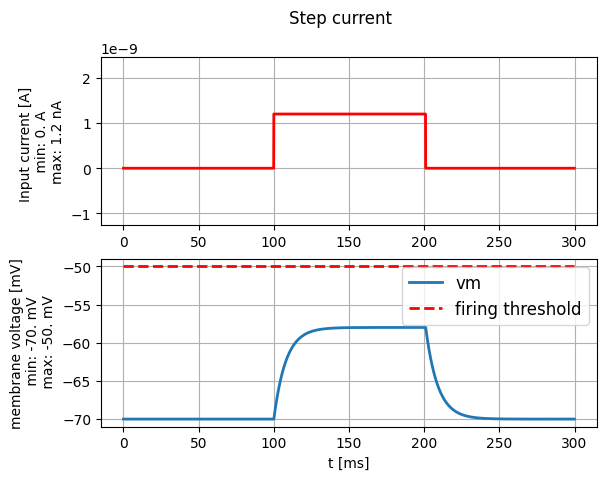

nr of spikes: 5


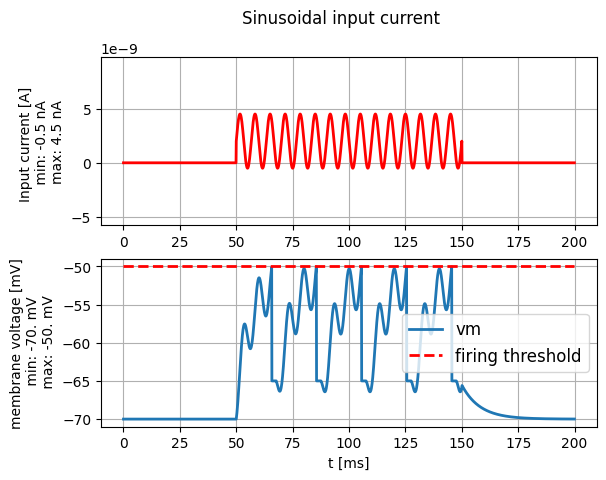

Resting potential: -70. mV
Reset voltage: -65. mV
Firing threshold: -50. mV
Membrane resistance: 10. Mohm
Membrane time-scale: 8. ms
Absolute refractory period: 2. ms


In [2]:
LIF.getting_started()
LIF.print_default_parameters()

Note that you can change all parameter of the LIF neuron by using the named parameters of the function ```simulate_LIF_neuron()```. 

If you do not specify any parameter, the following default values are used:

In [3]:
V_REST = -70*b2.mV
V_RESET = -65*b2.mV
FIRING_THRESHOLD = -50*b2.mV
MEMBRANE_RESISTANCE = 10. * b2.Mohm
MEMBRANE_TIME_SCALE = 8. * b2.ms
ABSOLUTE_REFRACTORY_PERIOD = 2.0 * b2.ms

## **1.1. Exercise: minimal current**

In the absence of an input current, a LIF neuron has a constant membrane voltage ```V_REST```. If an input current drives ```vm``` above the firing threshold, a spike is generated. Then, ```vm``` is reset to ```V_RESET``` and the neuron ignores any input during the refractroy period.

#### **1.1.1. Question: minimal current (calculation)**

For the default neuron parameters (see above), compute the minimal amplitude 𝐼𝑚𝑖𝑛
of a step current to elicitate a spike.

You can access the default values in your code and do the calculation with correct units:

In [4]:
from neurodynex3.leaky_integrate_and_fire import LIF
print('resting potential: {}'.format(LIF.V_REST))

resting potential: -70. mV


In [5]:
I_min = 2.00001 * b2.nA # 2.00002 will trigger the spike firing

#### **1.1.2. Question: minimal current (simulation)**

Use the value 𝐼𝑚𝑖𝑛
you’ve computed and verify your result: inject a step current of amplitude 𝐼𝑚𝑖𝑛 for 100ms into the LIF neuron and plot the membrane voltage. vm should approach the firing threshold but not fire. We have implemented a couple of helper functions to solve this task. Use this code block, but make sure you understand it and you’ve read the docs of the functions ```LIF.simulate_LIF_neuron()```, ```input_factory.get_step_current()``` and ```plot_tools.plot_voltage_and_current_traces()```.

nr of spikes: 0


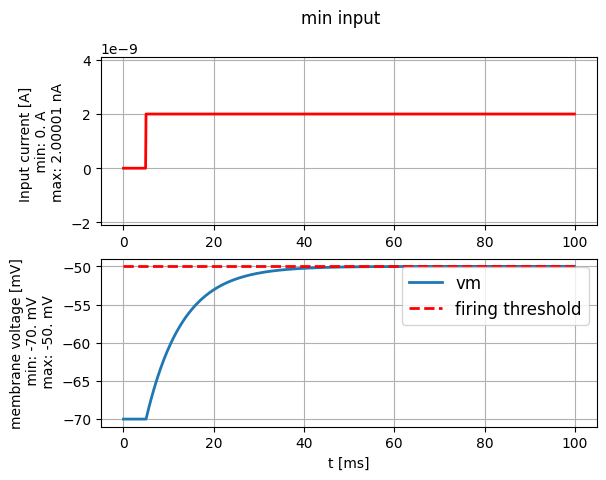

In [6]:
import brian2 as b2
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory

# create a step current with amplitude = I_min
step_current = input_factory.get_step_current(
    t_start=5, t_end=100, unit_time=b2.ms,
    amplitude=I_min)  # set I_min to your value

# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 100 * b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title='min input', firing_threshold=LIF.FIRING_THRESHOLD)
print('nr of spikes: {}'.format(spike_monitor.count[0]))  # should be 0

## **SOLUTION**
We have the values:
- $\theta = -50\,\mathrm{mV}$
- $u_{\mathrm{rest}} = -70\,\mathrm{mV}$
- $R = 10\,\mathrm{M}\Omega$
- $\tau = 8\,\mathrm{ms}$
- $t_{\mathrm{end}} = 100\,\mathrm{ms}$ (from Question 1.1.2)

The general formula for step current input is:
$$
u(t) = u_{\mathrm{REST}} + R \cdot I \cdot \left(1 - e^{-t/\tau} \right)
$$
In this case `u(t)` is our `θ`, and the solution is:
$$
I = \frac{\theta - u_{\text{rest}}}{R \left[ 1 - e^{-\frac{t}{\tau}} \right]}
$$
That equals to `2.00001nA`

## **1.2. Exercise: f-I Curve**

For a constant input current 𝐼, a LIF neuron fires regularly with firing frequency 𝑓. If the current is to small (𝐼<𝐼𝑚𝑖𝑛) 𝑓 is 0Hz; for larger 𝐼 the rate increases. 

A neuron’s firing-rate versus input-amplitude relationship is visualized in an “f-I curve”.

#### **1.2.1. Question: f-I Curve and refractoryness**

We now study the f-I curve for a neuron with a refractory period of 3ms (see ```LIF.simulate_LIF_neuron()``` to learn how to set a refractory period).
1. Sketch the f-I curve you expect to see.
2. What is the maximum rate at which this neuron can fire?
3. Inject currents of different amplitudes (from 0nA to 100nA) into a LIF neuron. For each current, run the simulation for 500ms and determine the firing frequency in Hz. Then plot the f-I curve. Pay attention to the low input current.


## SOLUTION

The frequence is:
$$
\frac{\text{spikes}}{\text{time (in seconds!)}}
$$

So I created the array for amplitudes `I = np.linspace(0, 100)` that contains 20 values from 0 to 100, and with a simple for loop i calculated the number of spikes to get the frequence

In [8]:

(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, abs_refractory_period= 3 * b2.ms, simulation_time = 500 * b2.ms)

I = np.linspace(0, 100, 20)
frequencies = []

for i in I:
    step_current = input_factory.get_step_current(
        t_start = 5, t_end = 500, unit_time = b2.ms,
        amplitude = i * b2.nA)
    
    _,spike_monitor = LIF.simulate_LIF_neuron(input_current=step_current, abs_refractory_period= 3 * b2.ms, simulation_time = 500 * b2.ms)
    frequencies.append(spike_monitor.count[0]/0.5) # 500ms = 0.5s

[  0.           5.26315789  10.52631579  15.78947368  21.05263158
  26.31578947  31.57894737  36.84210526  42.10526316  47.36842105
  52.63157895  57.89473684  63.15789474  68.42105263  73.68421053
  78.94736842  84.21052632  89.47368421  94.73684211 100.        ]


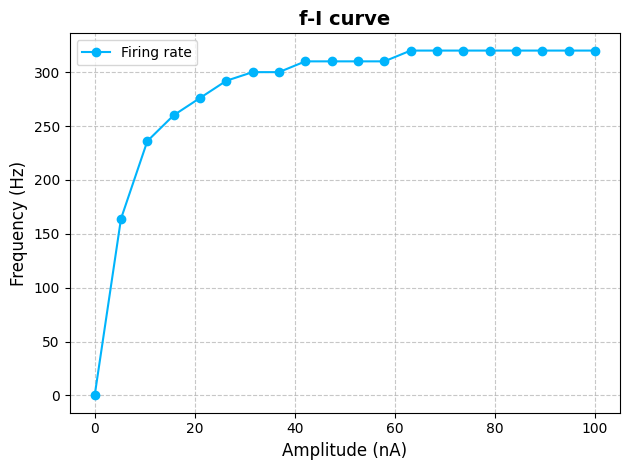

In [9]:
print(I)

# plot frequence and I
plt.plot(I, frequencies, marker='o', linestyle='-', color='#00b4fc', label='Firing rate')
plt.xlabel('Amplitude (nA)', fontsize=12)
plt.ylabel('Frequency (Hz)', fontsize=12)
plt.title('f-I curve', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()                      
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## **1.3. Exercise: “Experimentally” estimate the parameters of a LIF neuron**

A LIF neuron is determined by the following parameters: Resting potential, reset voltage, firing threshold, membrane resistance, membrane time-scale, absolute refractory period. 

By injecting a known test current into a LIF neuron (with unknown parameters), you can determine the neuron properties from the voltage response.

#### **1.3.1. Question: “Read” the LIF parameters out of the `vm` plot**

1. Get a random parameter set.
2. Create an input current of your choice.
3. Simulate the LIF neuron using the random parameters and your test-current. Note that the simulation runs for a fixed duration of 50ms.
4. Plot the membrane voltage and estimate the parameters. You do not have to write code to analyse the voltage data in the StateMonitor. Simply estimate the values from the plot. For the membrane resistance and the membrane time-scale you might have to change your current.
5. Compare your estimates with the true values.

Again, you do not have to write much code. Use the helper functions:

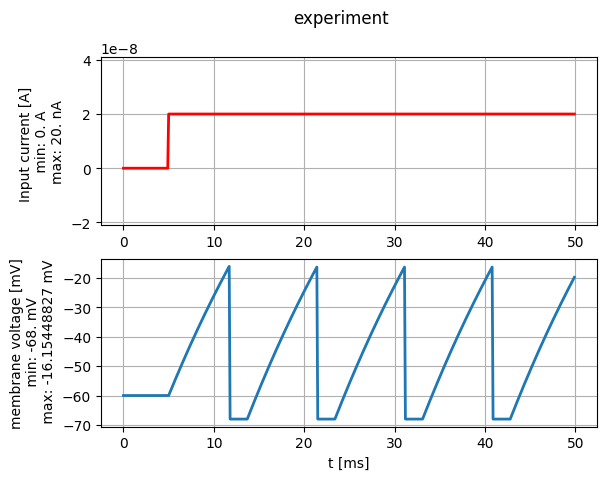

Resting potential: -60. mV
Reset voltage: -68. mV
Firing threshold: -16. mV
Membrane resistance: 9. Mohm
Membrane time-scale: 24. ms
Absolute refractory period: 2. ms


In [19]:
# get a random parameter. provide a random seed to have a reproducible experiment
random_parameters = LIF.get_random_param_set(random_seed=432)

# define your test current
test_current = input_factory.get_step_current(
    t_start=5, t_end=50, unit_time=b2.ms, amplitude= 20 * b2.nA)

# probe the neuron. pass the test current AND the random params to the function
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

# plot
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title='experiment')
plt.show()

# print the parameters to the console and compare with your estimates
LIF.print_obfuscated_parameters(random_parameters)

## SOLUTION

$\theta$, $u_{\text{rest}}$, and $u_{\text{reset}}$ can be estimated just by observing the plot.

The value of $R$ can be found using the general formula by considering $t = \infty$ (the end of the simulation) and taking $u(t)$ as the corresponding value from the plot:



$$
R = \frac{u(\infty) - u_{\text{rest}}}{I}
$$

To calculate the value of $\tau$ given $R$, the following formula can be used by choosing a fixed value of $t$ and the corresponding $u(t)$:

$$
\tau = -\frac{t}{\ln \left( 1 - \frac{R I}{u(t) - u_{\text{rest}}} \right)}
$$
